# Multi-Class Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)
# Suppress scientific notation in both Pandas and numpy
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)

/Users/nashjr/miniconda3/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10000,3.50000,1.40000,0.20000,setosa
1,4.90000,3.00000,1.40000,0.20000,setosa
2,4.70000,3.20000,1.30000,0.20000,setosa
3,4.60000,3.10000,1.50000,0.20000,setosa
4,5.00000,3.60000,1.40000,0.20000,setosa


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.00000,5.84333,0.82807,4.30000,5.10000,5.80000,6.40000,7.90000
sepal_width,150.00000,3.05400,0.43359,2.00000,2.80000,3.00000,3.30000,4.40000
petal_length,150.00000,3.75867,1.76442,1.00000,1.60000,4.35000,5.10000,6.90000
petal_width,150.00000,1.19867,0.76316,0.10000,0.30000,1.30000,1.80000,2.50000


In [6]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

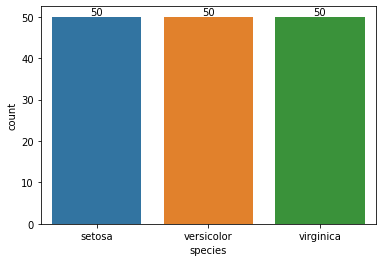

In [7]:
ax = sns.countplot(x=df['species'])
ax.bar_label(ax.containers[0]);

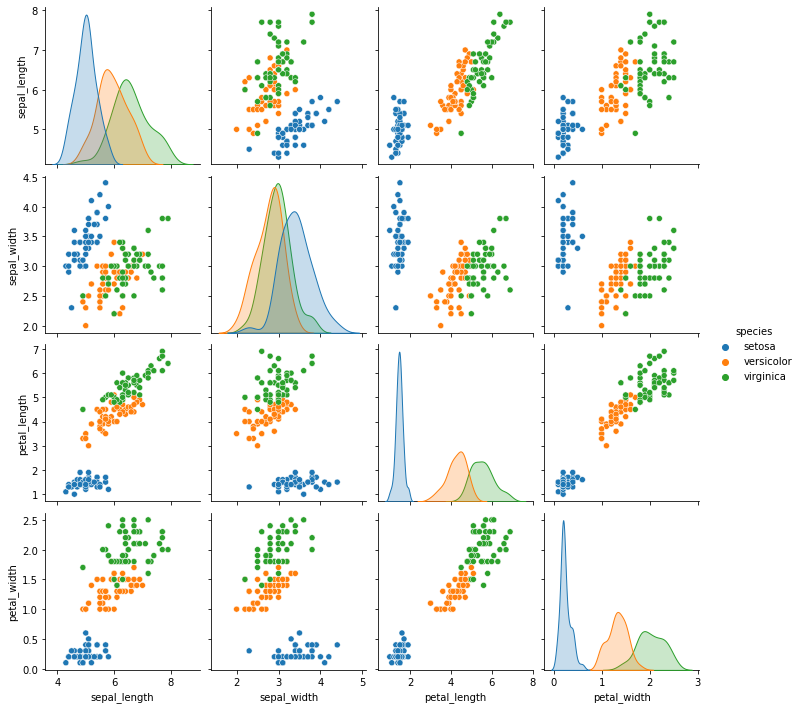

In [8]:
sns.pairplot(df,hue='species');

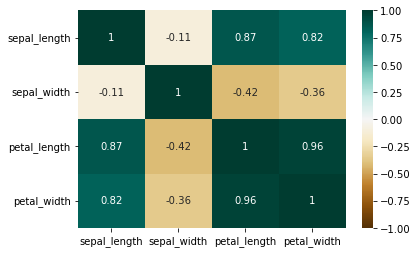

In [9]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='BrBG');

## Train | Test Split and Scaling

In [10]:
X = df.drop('species',axis=1)
y = df['species']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [13]:
scaler = StandardScaler()

In [14]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

### With Default Parameters

In [16]:
log_model = LogisticRegression()

In [17]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

/Users/nashjr/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


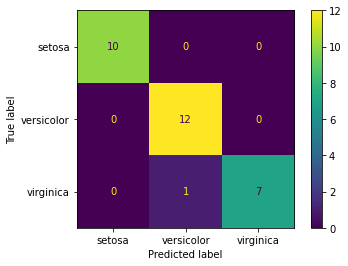

In [18]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)

In [19]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [20]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.92      1.00      0.96        12
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Train_Set
[[40  0  0]
 [ 0 35  3]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.92      0.95        38
   virginica       0.93      0.98      0.95        42

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



### Cross Validate

In [21]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.95000
test_precision_weighted   0.96000
test_recall_weighted      0.95000
test_f1_weighted          0.94921
dtype: float64

### Cross Validate for versicolar

In [22]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"])
precision_versicolor = make_scorer(precision_score, average = None, labels =["versicolor"])
recall_versicolor = make_scorer(recall_score, average = None, labels =["versicolor"])


scoring = {"f1_versicolor":f1_versicolor, 
           "precision_versicolor":precision_versicolor,
           "recall_versicolor":recall_versicolor}

In [23]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_versicolor          0.92381
test_precision_versicolor   0.94000
test_recall_versicolor      0.92500
dtype: float64

## Class prediction

In [24]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_setosa"] = y_pred_proba[:,0]
test_data["pred_proba_versicolar"] = y_pred_proba[:,1]
test_data["pred_proba_virginica"] = y_pred_proba[:,2]
test_data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,pred,pred_proba_setosa,pred_proba_versicolar,pred_proba_virginica
123,6.30000,2.70000,4.90000,1.80000,virginica,virginica,0.00101,0.32903,0.66996
96,5.70000,2.90000,4.20000,1.30000,versicolor,versicolor,0.05156,0.87475,0.07369
114,5.80000,2.80000,5.10000,2.40000,virginica,virginica,0.00016,0.02909,0.97075
48,5.30000,3.70000,1.50000,0.20000,setosa,setosa,0.98736,0.01264,0.00000
80,5.50000,2.40000,3.80000,1.10000,versicolor,versicolor,0.01876,0.94775,0.03348
88,5.60000,3.00000,4.10000,1.30000,versicolor,versicolor,0.09660,0.84579,0.05761
65,6.70000,3.10000,4.40000,1.40000,versicolor,versicolor,0.01397,0.87486,0.11117
134,6.10000,2.60000,5.60000,1.40000,virginica,versicolor,0.00127,0.51001,0.48871
129,7.20000,3.00000,5.80000,1.60000,virginica,virginica,0.00040,0.35368,0.64592
50,7.00000,3.20000,4.70000,1.40000,versicolor,versicolor,0.00912,0.85151,0.13937


### With Best Parameters (GridsearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [25]:
log_model = LogisticRegression(max_iter=5000)

In [26]:
penalty = ["l1", "l2"]
C = [0.01, 0.1, 1, 5, 16, 19, 22, 25]

param_grid = {"penalty" : penalty,
             "C" : C}

In [27]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=5) 
#scoring = f1_versicolor = make_scorer(f1_score, average = None, labels =["versicolor"]) 

In [28]:
grid_model.fit(X_train_scaled,y_train)

/Users/nashjr/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nashjr/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nashjr/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/nashjr/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_mo

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': [0.01, 0.1, 1, 5, 16, 19, 22, 25],
                         'penalty': ['l1', 'l2']})

In [29]:
grid_model.best_params_

{'C': 19, 'penalty': 'l2'}

In [30]:
grid_model.best_score_

0.975

In [31]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa'],
      dtype=object)

/Users/nashjr/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


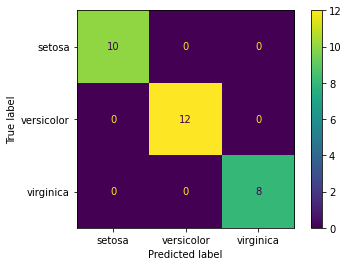

In [32]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [33]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        12
   virginica       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Train_Set
[[40  0  0]
 [ 0 37  1]
 [ 0  1 41]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.97      0.97      0.97        38
   virginica       0.98      0.98      0.98        42

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [34]:
from sklearn.metrics import plot_roc_curve

In [35]:
# plot_roc_curve(grid_model, X_test_scaled, y_test);

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

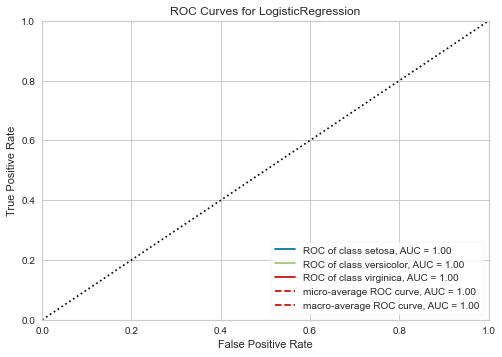

In [36]:
from yellowbrick.classifier import ROCAUC
model = LogisticRegression(C= 19, max_iter=5000)
visualizer = ROCAUC(model) # for binary data per_class=False, binary=True

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();               

/Users/nashjr/miniconda3/envs/ml/lib/python3.9/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


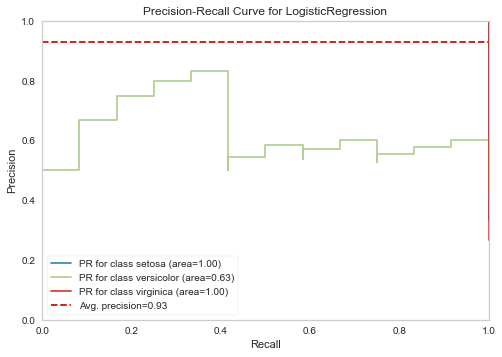

In [51]:
##############

from yellowbrick.classifier import PrecisionRecallCurve

model = LogisticRegression(C= 19, max_iter=5000)

viz = PrecisionRecallCurve(
    model,
    classes = ["setosa","versicolor","virginica"],
    per_class=True
)
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.show();

## Final Model and Model Deployment

In [38]:
scaler = StandardScaler().fit(X)

In [39]:
import pickle
pickle.dump(scaler, open("scaler_iris", 'wb'))

In [40]:
X_scaled = scaler.transform(X)

In [41]:
final_model = LogisticRegression().fit(X_scaled, y)

In [42]:
pickle.dump(final_model, open("final_model_iris", 'wb'))

In [43]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.00000,5.84333,0.82807,4.30000,5.10000,5.80000,6.40000,7.90000
sepal_width,150.00000,3.05400,0.43359,2.00000,2.80000,3.00000,3.30000,4.40000
petal_length,150.00000,3.75867,1.76442,1.00000,1.60000,4.35000,5.10000,6.90000
petal_width,150.00000,1.19867,0.76316,0.10000,0.30000,1.30000,1.80000,2.50000


In [44]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

In [45]:
sample = pd.DataFrame(my_dict)
sample

,sepal_length,sepal_width,petal_length,petal_width
0,4.50000,2.20000,1.30000,0.20000
1,5.80000,3.00000,4.30000,1.30000
2,7.50000,4.20000,6.50000,2.30000


In [46]:
scaler_iris = pickle.load(open("scaler_iris", "rb"))

In [47]:
sample_scaled = scaler_iris.transform(sample)
sample_scaled

array([[-1.62768839, -1.97618132, -1.39813811, -1.31297673],
       [-0.05250608, -0.1249576 ,  0.30783301,  0.13322594],
       [ 2.00734772,  2.65187798,  1.5588785 ,  1.44795564]])

In [48]:
final_model = pickle.load(open("final_model_iris", "rb"))

In [49]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [50]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.50000,2.20000,1.30000,0.20000,setosa,0.71592,0.28408,0.00000
1,5.80000,3.00000,4.30000,1.30000,versicolor,0.04404,0.89002,0.06594
2,7.50000,4.20000,6.50000,2.30000,virginica,0.00008,0.02063,0.97928
